In [46]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [49]:
df = pd.read_csv('spiral.csv')
df.samplemple(5)

,X,Y,Group
135,29.9,12.30,1
60,15.7,23.75,3
14,19.1,3.00,3
145,24.5,7.75,1
226,8.8,25.45,2


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       311 non-null    float64
 1   Y       311 non-null    float64
 2   Group   311 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.4 KB


In [50]:
df.describe()

,X,Y,Group
count,311.000000,311.000000,311.000000
mean,18.364630,16.371704,2.012862
std,7.270992,6.861701,0.815077
min,3.000000,2.900000,1.000000
25%,12.875000,11.375000,1.000000
50%,18.200000,16.050000,2.000000
75%,23.275000,21.425000,3.000000
max,31.650000,31.650000,3.000000


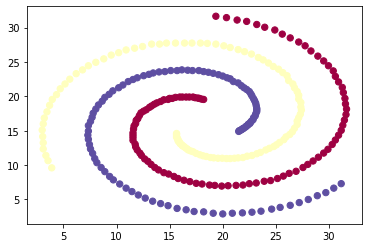

In [52]:
plt.scatter(df["X"], df["Y"], c=df["Group"], s=40, cmap=plt.cm.Spectral)
plt.show()
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

In [11]:
df.head()

,X,Y,Group
0,31.15,7.30,3
1,30.45,6.65,3
2,29.70,6.00,3
3,28.90,5.55,3
4,28.05,5.00,3


In [82]:
class NN:
    def __init__(self,n_features,n_hidden,n_classes):
        self.d = n_features # number of features in input layar
        self.h = n_hidden  # number of hiddedn layers
        self.n = n_classes # number of classes
        self.W1 = 0.01 * np.random.randn(self.d,self.h) # weights of the neurons
        self.b1 = np.zeros((1,self.h)) # bias of the neuron
        self.W2 = 0.01*np.random.randn(self.h,self.n) 
        self.b2 = np.zeros((1,self.n))
        
    
    def fwd_prop(self,X):
        z1 = np.dot(X,self.W1) + self.b1 # z1 = X.w1 + b1
        A1 = np.maximum(0,z1) # Relu activation Function
        z2 = np.dot(A1,self.W2) + self.b2 # z1 = X.w2 + b2
        z2 = np.exp(z2)
        A2 = z2 / np.sum(z2,axis=1,keepdims=True) 
        return A1, A2
    
    
    def cce_loss(self, y, probs): # cross entropy loss
        num_examples = y.shape[0]
        corect_logprobs = -np.log(probs[range(num_examples),y])
        loss = np.sum(corect_logprobs)/num_examples
        return loss
    
    def back_prob(self,X,A1,A2,y):
        
        # compute the gradient on scores
        num_examples = y.shape[0]
        dZ2 = A2
        dZ2[range(num_examples),y]-=1
        dZ2/=num_examples
        
        # first backpropagation into parameters w2 and b2
        dW2 = np.dot(A1.T,dz2)
        db2 = np.dot(dZ2,axis =0,keepdims=True)
        
        # next backpropagation into hidden layer A1
        dA1 = np.dot(dZ2,self.w2.T)
        
        # backpropagation the Relu non linearity
        dA1[A1<=0] = 0
        
        # final into w,b
        dZ1 = dA1
        dW1 = np.dot(X.T,dZ1)
        db1 = np.sum(dZ1,axis = 0,keepdims=True)
        return dW1, db1, dW2,db2
    
    
    def fit(self,X,lr,reg,max_iters):
        num_examples = X.shape[0]
        for i in range(max_iters):
            # forward prop
            A1,A2 = self.fwd_prop(X)
            
            # calculate loss 
            data_loss = self.cce_loss(y,A2)
            reg_loss = 0.5 *reg*np.sum(self.W1*self.W1) + 0.5 * reg*np.sum(self.W2*self.W2)
            loss = data_loss
            
            
            if i % 100 ==0:
                print("Itration %d: loss %f"%(i,loss))
                
            dW1, db1,dW2, db2 = self.back_prob(X,A1,A2,y)
            
            # addting regularization gredirnt contribution
            dW2 += reg * self.W2
            dW1 += reg * self.W1
            
            # performs a parameter update
            self.W1 += -lr * dW1
            self.b1 += -lr * db1
            self.W2 += -lr * dW2
            self.b2 += -lr * db2
            
    def predict(self,X):
        A1 = np.maximun(0,np.dot(X,self.W1) + self.b1)
        z2 = np.dot(A1,self.W2) + self.b2
        y_hat = np.argmax(z2,axis=1)
        return y_hat
            
nn_model = NN(n_features = 2,n_hidden=100,n_classes=3)
nn_model.fit(X,lr=1,reg = 1e-3,max_iters=10000)
print("training acuuracy &.2f"%(np.mean(nn_model.predict(x) == y)))

IndexError: index 3 is out of bounds for axis 1 with size 3

## 